In [1]:
# Fixing path
import os

os.getcwd()   # Verify where it is right now...

'/home/jobquiroz/full_stack_deep_learning/lab04/notebooks'

In [2]:
# Solution, go to lab directory:
os.chdir('/home/jobquiroz/full_stack_deep_learning/lab04/')

In [3]:
from IPython.display import display, HTML, IFrame

full_width = True
frame_height = 720  # adjust for your screen

if full_width:  # if we want the notebook to take up the whole width
    # add styling to the notebook's HTML directly
    display(HTML("<style>.container { width:100% !important; }</style>"))
    display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

In [4]:
from text_recognizer.data.iam import IAM  # base dataset of images of handwritten text
from text_recognizer.data import IAMLines  # processed version split into individual lines
from text_recognizer.models import LineCNNTransformer  # simple CNN encoder / Transformer decoder

print(IAM.__doc__)

# uncomment a line below for details on either class
# IAMLines??  
# LineCNNTransformer??

A dataset of images of handwritten text written on a form underneath a typewritten prompt.

    "The IAM Lines dataset, first published at the ICDAR 1999, contains forms of unconstrained handwritten text,
    which were scanned at a resolution of 300dpi and saved as PNG images with 256 gray levels."
    From http://www.fki.inf.unibe.ch/databases/iam-handwriting-database

    Images are identified by their "form ID". These IDs are used to separate train, validation and test splits,
    as keys for dictonaries returning label and image crop region data, and more.

    The data split we will use is
    IAM lines Large Writer Independent Text Line Recognition Task (LWITLRT): 9,862 text lines.
        The validation set has been merged into the train set.
        The train set has 7,101 lines from 326 writers.
        The test set has 1,861 lines from 128 writers.
        The text lines of all data sets are mutually exclusive, thus each writer has contributed to one set only.
    


The cell below will train a model on 10% of the data for two epochs.

It takes up to a few minutes to run on commodity hardware, including data download and preprocessing. As it's running, continue reading below.

In [5]:
%%time
import torch


gpus = int(torch.cuda.is_available()) 

%run training/run_experiment.py --model_class LineCNNTransformer --data_class IAMLines \
  --loss transformer --batch_size 32 --gpus {gpus} --max_epochs 2 \
  --limit_train_batches 0.1 --limit_val_batches 0.1 --limit_test_batches 0.1 --log_every_n_steps 10

Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                      | Type               | Params
------------------------------------------------------------------
0  | model                     | LineCNNTransformer | 4.3 M 
1  | model.line_cnn            | LineCNN            | 1.6 M 
2  | model.embedding           | Embedding          | 21.2 K
3  | model.fc                  | Linear             | 21.3 K
4  | model.pos_encoder         | PositionalEncoding | 0     
5  | model.transformer_decoder | TransformerDecoder | 2.6 M 
6  | train_acc                 | Accuracy           | 0     
7  | val_acc                   | Accuracy           | 0     
8  | test_acc      

Model State Dict Disk Size: 17.23 MB


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

Best model saved at: /home/jobquiroz/full_stack_deep_learning/lab04/training/logs/lightning_logs/version_5/epoch=0000-validation.loss=3.127-validation.cer=1.893.ckpt


──────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
──────────────────────────────────────────────────────────────────────────────────────────────────────────
        test/cer             2.03977632522583
        test/loss            3.238344192504883
──────────────────────────────────────────────────────────────────────────────────────────────────────────
CPU times: user 43.6 s, sys: 8.35 s, total: 52 s
Wall time: 1min 2s


### TensorBoard

In [6]:
# we use a sequence of bash commands to get the latest experiment's directory
#  by hand, you can just copy and paste it from the terminal

list_all_log_files = "find training/logs/lightning_logs/"  # find avoids issues ls has with \n in filenames
filter_to_folders = "grep '_[0-9]*$'"  # regex match on end of line
sort_version_descending = "sort -Vr"  # uses "version" sorting (-V) and reverses (-r)
take_first = "head -n 1"  # the first n elements, n=1

In [7]:
latest_log, = ! {list_all_log_files} | {filter_to_folders} | {sort_version_descending} | {take_first}
latest_log

'training/logs/lightning_logs/version_5'

In [8]:
!ls -lh {latest_log}

total 99M
-rw-r--r-- 1 jobquiroz jobquiroz  50M Aug 31 17:18 'epoch=0000-validation.loss=3.127-validation.cer=1.893.ckpt'
-rw-r--r-- 1 jobquiroz jobquiroz  50M Aug 31 17:18 'epoch=0001-validation.loss=3.122-validation.cer=1.893.ckpt'
-rw-r--r-- 1 jobquiroz jobquiroz 1.3K Aug 31 17:18  events.out.tfevents.1661966286.deep-learning.2945.0
-rw-r--r-- 1 jobquiroz jobquiroz  176 Aug 31 17:18  events.out.tfevents.1661966332.deep-learning.2945.1
-rw-r--r-- 1 jobquiroz jobquiroz    3 Aug 31 17:18  hparams.yaml


In [9]:
%load_ext tensorboard

In [16]:
# same command works in terminal, with "{arguments}" replaced with values or "$VARIABLES"

port = 6006  # pick an open port on your machine
host = "0.0.0.0" # allow connections from the internet
                 #   watch out! make sure you turn TensorBoard off

%tensorboard --logdir {latest_log} --port {port} --host {host}

All lightning_logs:

In [17]:
%tensorboard --logdir training/logs/lightning_logs --port {port + 1} --host "0.0.0.0"

In [18]:
import tensorboard.manager

# get the process IDs for all tensorboard instances
pids = [tb.pid for tb in tensorboard.manager.get_all()]

done_with_tensorboard = False

if done_with_tensorboard:
    # kill processes
    for pid in pids:
        !kill {pid} 2> /dev/null
        
    # remove the temporary files that sometimes persist, see https://stackoverflow.com/a/59582163
    !rm -rf {tensorboard.manager._get_info_dir()}

## W & B

In [9]:
import wandb

print(wandb.__doc__)

Use wandb to track machine learning work.

The most commonly used functions/objects are:
  - wandb.init — initialize a new run at the top of your training script
  - wandb.config — track hyperparameters and metadata
  - wandb.log — log metrics and media over time within your training loop

For guides and examples, see https://docs.wandb.com/guides.

For scripts and interactive notebooks, see https://github.com/wandb/examples.

For reference documentation, see https://docs.wandb.com/ref/python.



In [10]:
!grep "args.wandb" -A 5 training/run_experiment.py | head -n 6

    if args.wandb:
        logger = pl.loggers.WandbLogger(log_model="all", save_dir=str(log_dir), job_type="train")
        logger.watch(model, log_freq=max(100, args.log_every_n_steps))
        logger.log_hyperparams(vars(args))
        experiment_dir = logger.experiment.dir
    callbacks += [cb.ModelSizeLogger(), cb.LearningRateMonitor()]


In [11]:
from pytorch_lightning.loggers import WandbLogger


WandbLogger??

In [12]:
!wandb login

wandb: Currently logged in as: jobquiroz. Use `wandb login --relogin` to force relogin


In [13]:
%%time

%run training/run_experiment.py --model_class LineCNNTransformer --data_class IAMLines \
  --loss transformer --batch_size 32 --gpus {gpus} --max_epochs 10 \
  --log_every_n_steps 10 --wandb --limit_test_batches 0.1 \
  --limit_train_batches 0.1 --limit_val_batches 0.1
    
last_expt = wandb.run

wandb.finish()  # necessary in this style of in-notebook experiment running, not necessary in CLI

wandb: Currently logged in as: jobquiroz. Use `wandb login --relogin` to force relogin


wandb: logging graph, to disable use `wandb.watch(log_graph=False)`
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                      | Type               | Params
------------------------------------------------------------------
0  | model                     | LineCNNTransformer | 4.3 M 
1  | model.line_cnn            | LineCNN            | 1.6 M 
2  | model.embedding           | Embedding          | 21.2 K
3  | model.fc                  | Linear             | 21.3 K
4  | model.pos_encoder         | PositionalEncoding | 0     
5  | model.transformer_decoder | TransformerDecoder | 2.6 M 
6  | train_acc                 | Accuracy           | 0     
7  | val_acc

Model State Dict Disk Size: 17.23 MB


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

Best model saved at: /home/jobquiroz/full_stack_deep_learning/lab04/training/logs/lightning_logs/version_6/epoch=0006-validation.loss=2.467-validation.cer=0.863.ckpt
Best model also uploaded to W&B 


────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────
        test/cer            0.9909008145332336
        test/loss           2.4565465450286865
────────────────────────────────────────────────────────────────────────────────────────


epoch,▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇█
optimizer/lr-Adam,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
size/mb_disk,▁
size/nparams,▁
test/cer,▁
test/loss,▁
train/loss,██▇▇▇▇▇▇▆▅▄▃▂▃▃▂▂▃▂▂▂▁▂▁▁▁▂▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇███
validation/cer,███▆▇▇▁▁▇▁
validation/loss,███▄▃▃▂▂▂▁
epoch,10


CPU times: user 2min 42s, sys: 28.4 s, total: 3min 11s
Wall time: 3min 25s


In [14]:
last_expt

### Runs

In [15]:
print(last_expt.url)
IFrame(last_expt.url, width="100%", height=frame_height)

https://wandb.ai/jobquiroz/full_stack_deep_learning-lab04/runs/1rp5c8fe


In [16]:
table_versions_url = last_expt.url.split("runs")[0] + f"artifacts/run_table/run-{last_expt.id}-trainpredictions/"
table_data_url = table_versions_url + "v0/files/train/predictions.table.json"

print(table_data_url)
IFrame(src=table_data_url, width="100%", height=frame_height)

https://wandb.ai/jobquiroz/full_stack_deep_learning-lab04/artifacts/run_table/run-1rp5c8fe-trainpredictions/v0/files/train/predictions.table.json


In [32]:
from text_recognizer.callbacks.imtotext import ImageToTextTableLogger

ImageToTextTableLogger??

In [33]:
from text_recognizer.lit_models.base import BaseImageToTextLitModel

BaseImageToTextLitModel.add_on_logged_batches??

I'm not done yet...

## Projects


### Programmatic Access

In [17]:
last_expt.entity

'jobquiroz'

In [18]:
last_expt.project

'full_stack_deep_learning-lab04'

In [19]:
last_expt.id

'1rp5c8fe'

In [20]:
wb_api = wandb.Api()

In [21]:
run = wb_api.run("/".join( # fetch a run given
    [last_expt.entity,     # the user or org it was logged to
     last_expt.project,    # the "project", usually one of several per repo/application
     last_expt.id]         # and a unique ID
))

hist = run.history()  # and pull down a sample of the data as a pandas DataFrame

hist.head(5)

,trainer/global_step,_step,_runtime,size/nparams,size/mb_disk,_timestamp,validation/predictions,optimizer/lr-Adam,train/predictions,train/loss,...,gradients/transformer_decoder.layers.0.norm3.bias,gradients/transformer_decoder.layers.2.self_attn.in_proj_weight,gradients/transformer_decoder.layers.1.self_attn.in_proj_weight,gradients/transformer_decoder.layers.0.linear1.weight,gradients/line_cnn.convs.2.conv.weight,gradients/transformer_decoder.layers.1.norm3.weight,gradients/transformer_decoder.layers.1.self_attn.out_proj.weight,gradients/transformer_decoder.layers.1.norm2.weight,test/cer,test/loss
0,-1,0,8,4297331.0,17.22701,1661966344,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,10,NaN,NaN,1661966346,{'artifact_path': 'wandb-client-artifact://t9r...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2,11,NaN,NaN,1661966347,NaN,0.001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,3,13,NaN,NaN,1661966349,NaN,0.001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,4,14,NaN,NaN,1661966350,NaN,NaN,{'path': 'media/table/train/predictions_4_9748...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
hist.groupby("epoch")["train/loss"].mean()

epoch
0.0     3.321208
1.0     3.160990
2.0     3.174500
3.0     2.961284
4.0     2.642284
5.0     2.658995
6.0     2.599283
7.0     2.531157
8.0     2.486359
9.0     2.502108
10.0         NaN
Name: train/loss, dtype: float64

In [23]:
# which artifacts where created and logged?
artifacts = run.logged_artifacts()

for artifact in artifacts:
    print(f"artifact of type {artifact.type}: {artifact.name}")

artifact of type run_table: run-1rp5c8fe-validationpredictions:v0
artifact of type run_table: run-1rp5c8fe-trainpredictions:v0
artifact of type run_table: run-1rp5c8fe-trainpredictions:v1
artifact of type run_table: run-1rp5c8fe-validationpredictions:v1
artifact of type model: model-1rp5c8fe:v0
artifact of type run_table: run-1rp5c8fe-trainpredictions:v2
artifact of type run_table: run-1rp5c8fe-trainpredictions:v3
artifact of type run_table: run-1rp5c8fe-trainpredictions:v4
artifact of type run_table: run-1rp5c8fe-validationpredictions:v2
artifact of type model: model-1rp5c8fe:v1
artifact of type run_table: run-1rp5c8fe-trainpredictions:v5
artifact of type run_table: run-1rp5c8fe-trainpredictions:v6
artifact of type run_table: run-1rp5c8fe-trainpredictions:v7
artifact of type run_table: run-1rp5c8fe-validationpredictions:v3
artifact of type model: model-1rp5c8fe:v2
artifact of type run_table: run-1rp5c8fe-trainpredictions:v8
artifact of type run_table: run-1rp5c8fe-trainpredictions:v9


In [24]:
from pathlib import Path

artifact = wb_api.artifact(f"{last_expt.entity}/{last_expt.project}/run-{last_expt.id}-trainpredictions:latest")
artifact_dir = Path(artifact.download(root="training/logs"))
image_dir = artifact_dir / "media" / "images"

images = [path for path in image_dir.iterdir()]

In [25]:
artifact_dir

PosixPath('training/logs')

In [26]:
!ls training/logs -la

total 24
drwxr-xr-x 6 jobquiroz jobquiroz 4096 Aug 30 19:35 .
drwxr-xr-x 4 jobquiroz jobquiroz 4096 Aug 30 01:17 ..
drwxr-xr-x 9 jobquiroz jobquiroz 4096 Aug 31 17:19 lightning_logs
drwxr-xr-x 3 jobquiroz jobquiroz 4096 Aug 30 19:35 media
drwxr-xr-x 2 jobquiroz jobquiroz 4096 Aug 30 19:35 train
drwxr-xr-x 5 jobquiroz jobquiroz 4096 Aug 31 17:18 wandb


In [27]:
images

[PosixPath('training/logs/media/images/cf869b842dee0124639b.png'),
 PosixPath('training/logs/media/images/eb9073928afd080006fa.png'),
 PosixPath('training/logs/media/images/908cb06b021569d7ea8f.png'),
 PosixPath('training/logs/media/images/8dad95613bae624d82bb.png'),
 PosixPath('training/logs/media/images/a860db868e00dd9dab66.png'),
 PosixPath('training/logs/media/images/7307df1b02786438b4c7.png'),
 PosixPath('training/logs/media/images/e97392ce19f66089ad50.png'),
 PosixPath('training/logs/media/images/da9279714d1698cefc6f.png'),
 PosixPath('training/logs/media/images/cd49cf8327a16fa9e36d.png'),
 PosixPath('training/logs/media/images/a3deacb3a70e1e6c2e09.png'),
 PosixPath('training/logs/media/images/ae44cd874a3442bd1a8e.png'),
 PosixPath('training/logs/media/images/261ab814bbf3201891f7.png'),
 PosixPath('training/logs/media/images/eb17fe4876fccb9627ff.png'),
 PosixPath('training/logs/media/images/93ce94f09bd14c7a5b16.png'),
 PosixPath('training/logs/media/images/a7f3b95017ce8bafe519.pn

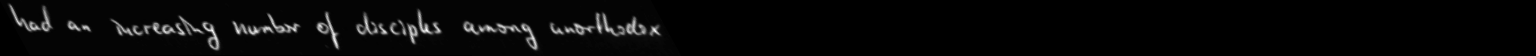

In [28]:
import random

from IPython.display import Image

Image(str(random.choice(images)))

In [29]:
text_recognizer_project = wb_api.project("fsdl-text-recognizer-2021-training", entity="cfrye59")

text_recognizer_project  

<Project cfrye59/fsdl-text-recognizer-2021-training>

In [30]:
text_recognizer_project.artifacts_types()

In [31]:
# collect all versions of the text-recognizer ever put into production by...

for art_type in text_recognizer_project.artifacts_types(): # looking through all artifact types
    if art_type.name == "prod-ready":  # for the prod-ready type
        # and grabbing the text-recognizer
        production_text_recognizers = art_type.collection("paragraph-text-recognizer").versions()

# and then get the one that's currently being tested in CI by...
for text_recognizer in production_text_recognizers:
    if "ci-test" in text_recognizer.aliases:  # looking for the one that's labeled as CI-tested
        in_prod_text_recognizer = text_recognizer

# view its metadata at the url or in the notebook
in_prod_text_recognizer_url = text_recognizer_project.url[:-9] + f"artifacts/{in_prod_text_recognizer.type}/{in_prod_text_recognizer.name.replace(':', '/')}"

print(in_prod_text_recognizer_url)
IFrame(src=in_prod_text_recognizer_url, width="100%", height=frame_height)

https://wandb.ai/cfrye59/fsdl-text-recognizer-2021-training/artifacts/prod-ready/paragraph-text-recognizer/v8


In [32]:
staging_run = in_prod_text_recognizer.logged_by()

training_ckpt, = [at for at in staging_run.used_artifacts() if at.type == "model"]
training_ckpt.name

'model-1vrnrd8p:v41'

In [33]:
training_run = training_ckpt.logged_by()
print(training_run.url)
IFrame(src=training_run.url, width="100%", height=frame_height)

https://wandb.ai/cfrye59/fsdl-text-recognizer-2021-training/runs/1vrnrd8p


In [34]:
training_results = training_run.history(samples=10000)
training_results.head()

,trainer/global_step,_step,_runtime,size/nparams,size/mb_disk,_timestamp,validation/predictions,optimizer/lr-Adam,gradients/encoder_projection.weight,gradients/transformer_decoder.layers.0.linear2.bias,...,gradients/transformer_decoder.layers.1.self_attn.out_proj.weight,gradients/resnet.4.1.bn2.bias,gradients/transformer_decoder.layers.1.norm2.weight,train/predictions,train/loss,epoch,validation/cer,validation/loss,test/cer,test/loss
0,-1,0,98,13988756.0,56.064631,1654129282,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,133,NaN,NaN,1654129317,"{'size': 34810, '_latest_artifact_path': 'wand...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2,133,NaN,NaN,1654129317,NaN,0.0001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39,3,159,NaN,NaN,1654129343,NaN,0.0001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78,4,177,NaN,NaN,1654129361,NaN,0.0001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
ax = training_results.groupby("epoch")["train/loss"].mean().plot();
training_results["validation/loss"].dropna().plot(logy=True); ax.legend();

In [36]:
idx = 10
training_results["validation/loss"].dropna().iloc[10]

0.19675205647945404

## Hyperparameter optimization

In [38]:
%%writefile training/simple-overfit-sweep.yaml
# first we specify what we're sweeping
# we specify a program to run
program: training/run_experiment.py
# we optionally specify how to run it, including setting default arguments
command:  
    - ${env}
    - ${interpreter}
    - ${program}
    - "--wandb"
    - "--overfit_batches"
    - "1"
    - "--log_every_n_steps"
    - "25"
    - "--max_epochs"
    - "100"
    - "--limit_test_batches"
    - "0"
    - ${args}  # these arguments come from the sweep parameters below

# and we specify which parameters to sweep over, what we're optimizing, and how we want to optimize it
method: random  # generally, random searches perform well, can also be "grid" or "bayes"
metric:
    name: train/loss
    goal: minimize
parameters:  
    # LineCNN hyperparameters
    window_width:
        values: [8, 16, 32, 64]
    window_stride:
        values: [4, 8, 16, 32]
    # Transformer hyperparameters
    tf_layers:
        values: [1, 2, 4, 8]
    # we can also fix some values, just like we set default arguments
    gpus:
        value: 1
    model_class:
        value: LineCNNTransformer
    data_class:
        value: IAMLines
    loss:
        value: transformer

Writing training/simple-overfit-sweep.yaml


In [39]:
!wandb sweep training/simple-overfit-sweep.yaml --project fsdl-line-recognizer-2022
simple_sweep_id = wb_api.project("fsdl-line-recognizer-2022").sweeps()[0].id

wandb: Creating sweep from: training/simple-overfit-sweep.yaml
wandb: Created sweep with ID: wij1afrq
wandb: View sweep at: https://wandb.ai/jobquiroz/fsdl-line-recognizer-2022/sweeps/wij1afrq
wandb: Run sweep agent with: wandb agent jobquiroz/fsdl-line-recognizer-2022/wij1afrq


In [40]:
simple_sweep_id

'wij1afrq'

In [41]:
%%time

# interrupt twice to terminate this cell if it's running too long,
#   it can be over 15 minutes with some hyperparameters

!wandb agent --project fsdl-line-recognizer-2022 --entity {wb_api.default_entity} --count=1 {simple_sweep_id}

wandb: Starting wandb agent 🕵️
2022-08-31 17:30:40,324 - wandb.wandb_agent - INFO - Running runs: []
2022-08-31 17:30:40,459 - wandb.wandb_agent - INFO - Agent received command: run
2022-08-31 17:30:40,459 - wandb.wandb_agent - INFO - Agent starting run with config:
	data_class: IAMLines
	gpus: 1
	loss: transformer
	model_class: LineCNNTransformer
	tf_layers: 4
	window_stride: 8
	window_width: 16
2022-08-31 17:30:40,461 - wandb.wandb_agent - INFO - About to run command: /usr/bin/env python training/run_experiment.py --wandb --overfit_batches 1 --log_every_n_steps 25 --max_epochs 100 --limit_test_batches 0 --data_class=IAMLines --gpus=1 --loss=transformer --model_class=LineCNNTransformer --tf_layers=4 --window_stride=8 --window_width=16
wandb: Currently logged in as: jobquiroz. Use `wandb login --relogin` to force relogin
wandb: wandb version 0.13.2 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.12.17
wandb: Run data

Exercise

In [42]:
import math
import os
import random

import wandb


os.makedirs("logs", exist_ok=True)

project = "trying-wandb"
config = {"steps": 50}


with wandb.init(project=project, config=config) as run:
    steps = wandb.config["steps"]
    
    for ii in range(steps):
        loss = math.exp(-ii) + random.random() / (ii + 1)  # ML means making the loss go down
        
    with open("logs/hello.txt", "w") as f:
        f.write("hello from wandb, my dudes!")
        
    run_id = run.id

In [44]:
hello_run = wb_api.run(f"{project}/{run_id}")

# check for logged loss data
if "loss" not in hello_run.history().keys():
    print("loss not logged 🥲")
else:
    print("loss logged successfully 🥞")
    if len(hello_run.history()["loss"]) != steps:
        print("loss not logged on all steps 🥲")
    else:
        print("loss logged on all steps 🥞")

artifacts =  hello_run.logged_artifacts()

# check for artifact with the right name
if "hello:v0" not in [artifact.name for artifact in artifacts]:
    print("hello artifact not logged 🥲")
else:
    print("hello artifact logged successfully 🥞")
    # check for the file inside the artifacts
    if "hello.txt" not in sum([list(artifact.manifest.entries.keys()) for artifact in artifacts], []):
        print("could not find hello.txt 🥲")
    else:
        print("hello.txt logged successfully 🥞")
    
    
hello_run

loss not logged 🥲
hello artifact not logged 🥲


<Run jobquiroz/trying-wandb/2jvkno2d (finished)>

In [45]:
wb_api.project("fsdl-line-recognizer-2022").sweeps()

[<Sweep jobquiroz/fsdl-line-recognizer-2022/wij1afrq>]